In [1]:
import sys
import os 
import numpy as np
import pandas as pd
import seaborn as sb
import random
import itertools
import math
import copy
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('/home/yakaboskic/courses/engs103Project/data/dart-grad-data-clean.csv')
df_data = df_data.dropna()
df_data.head()

,LO Street1,LO City,LO State,LO Zip
0,705 Canaan St.,Canaan,NH,03741
1,392 Jones Hill Road,Canaan,NH,03741
2,9 Roberts Rd. #202,Canaan,NH,03741
3,161 Smith Pond Road,Enfield,NH,03748
4,153 Shaker Hill Road #1,Enfield,NH,03748


In [3]:
df_data['LO City'].unique()
sachem_roads = ['Sachem', 'Drake', 'Gould', 'Haddock', 'Ralston']

In [4]:
city = df_data['LO City']
street = df_data['LO Street1']
h1 = ~city.str.contains('HANOVER')
h2 = ~city.str.contains('hanover')
h3 = ~city.str.contains('Hanvoer')
leb1 = ~city.str.contains('LEBANON')
wleb1 = ~city.str.contains('West Labanon')
wleb2 = ~city.str.contains('West Leb')
wleb3 = ~city.str.contains('WEST LEBANNON')
wleb4 = ~city.str.contains('West lebanon')
wleb5 = ~city.str.contains('west lebanon')
wrj1 = ~city.str.contains('White River Jct')
wrj2 = ~city.str.contains('white river junction')
sachem = ~street.str.contains('|'.join(sachem_roads))

In [5]:
df_data['LO City'] = df_data['LO City'].where(h1, 'Hanover')
df_data['LO City'] = df_data['LO City'].where(h2, 'Hanover')
df_data['LO City'] = df_data['LO City'].where(h3, 'Hanover')
df_data['LO City'] = df_data['LO City'].where(leb1, 'Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb1, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb2, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb3, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb4, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wleb5, 'West Lebanon')
df_data['LO City'] = df_data['LO City'].where(wrj1, 'White River Junction')
df_data['LO City'] = df_data['LO City'].where(wrj2, 'White River Junction')
df_data['LO City'] = df_data['LO City'].where(sachem, 'Sachem')

In [6]:
df_data['LO City'].unique()

array(['Canaan', 'Enfield', 'Etna', 'Hanover', 'Sachem', 'Hartford',
       'Hartland', 'Hoboken', 'Lebanon', 'Lyme', 'Norwich',
       'West Lebanon', 'White River Junction'], dtype=object)

In [7]:
stops = ['Enfield', 'Sachem', 'Lebanon', 'Norwich', 'West Lebanon', 'White River Junction']

In [8]:
df_stopOnly = df_data[df_data['LO City'].isin(stops)]

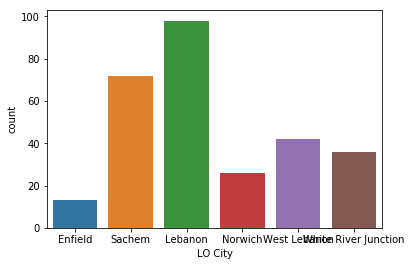

In [9]:
sb.countplot(x='LO City', data=df_stopOnly)

In [10]:
total = df_stopOnly['LO City'].count()
stats = df_stopOnly['LO City'].value_counts()/total
print(df_stopOnly['LO City'].value_counts())
print(stats)

Lebanon                 98
Sachem                  72
West Lebanon            42
White River Junction    36
Norwich                 26
Enfield                 13
Name: LO City, dtype: int64
Lebanon                 0.341463
Sachem                  0.250871
West Lebanon            0.146341
White River Junction    0.125436
Norwich                 0.090592
Enfield                 0.045296
Name: LO City, dtype: float64


In [11]:
def city_rand():
    rand = random.random()
    start = 0
    end = stats.Lebanon
    if rand <= end:
        return 'Lebanon'
    start = end
    end = start + stats.Sachem
    if rand > start and rand <= end:
        return 'Sachem'
    start = end
    end = start + stats['West Lebanon']
    if rand > start and rand <= end:
        return 'West Lebanon'
    start = end
    end = start + stats['White River Junction']
    if rand > start and rand <= end:
        return 'White River Junction'
    start = end
    end = start + stats.Norwich
    if rand > start and rand <= end:
        return 'Norwich'
    start = end
    end = start + stats['Enfield']
    if rand > start and rand <= end:
        return 'Enfield'
    else:
        return 'Issue'

In [12]:
df_dist = pd.read_csv('/home/yakaboskic/courses/engs103Project/data/UpperValleyDists.csv')
df_dist = df_dist.set_index('Unnamed: 0')
df_dist = df_dist.fillna(0)
df_dist

,Hanover,Lebanon,West Lebanon,Norwich,White River Junction,Wilder,Sachem,Enfield
Unnamed: 0,,,,,,,,
Hanover,0.0,5.7,4.3,1.6,4.5,4.0,1.6,10.8
Lebanon,5.7,0.0,3.6,7.5,4.5,5.9,7.0,6.7
West Lebanon,4.3,3.6,0.0,5.6,1.0,2.4,3.6,10.7
Norwich,1.6,7.5,5.6,0.0,5.2,3.5,3.2,12.8
White River Junction,4.5,4.5,1.0,5.2,0.0,1.9,3.8,11.5
Wilder,4.0,5.9,2.4,3.5,1.9,0.0,5.2,15.2
Sachem,1.6,7.0,3.6,3.2,3.8,5.2,0.0,12.3
Enfield,10.8,6.7,10.7,12.8,11.5,15.2,12.3,0.0


In [13]:
def get_tsp_trip(stops):
    start = 'Hanover'
    end = 'Hanover'
    distance_results = []
    stops = set(stops)
    for perm in itertools.permutations(stops, r=len(stops)):
        tour = list(perm)
        tour.insert(0, 'Hanover')
        tour.append('Hanover')
        distance = 0
        start = 'Hanover'
        for stop in tour:
            distance = distance + df_dist.loc[start, stop]
            start = stop
        distance_results.append([distance, tour])
    return sorted(distance_results)[0]

In [14]:
get_tsp_trip(['White River Junction', 'Norwich',  'Enfield'])

[29.1, ['Hanover', 'Enfield', 'White River Junction', 'Norwich', 'Hanover']]

In [15]:
AVG_MILES_HR = 20
AVG_ARRIVALS_HR = 4
AVG_STOP_TIME = 1
MPG = 15
GAS_PRICE_GALLON = 3
DEPRECIATION = 30000/100000
COST_PER_MILE = GAS_PRICE_GALLON/MPG + DEPRECIATION

def simulation(runs=100):
    results = []
    for run in range(runs):
        I = 0
        N = 0
        t = 0
        t_l = 240
        t_ss = 999
        t_sf = 999
        t_nc = np.random.exponential((1/AVG_ARRIVALS_HR)*60)
        j = 0
        Q = []
        cost = 0
        wait_times = []
        while t < t_l:
            t = min(t_l, t_ss, t_sf, t_nc)
            #print(t)
            if t == t_nc:
                j = j + 1
                t_j = copy.deepcopy(t)
                #print('New customer in line at time:', t_j)
                tour = get_tsp_trip([city_rand() for i in range(0, random.randint(1,4))])
                #print(tour)
                Q.append((t_j, tour))
                if N == 0:
                    t_ss = t
                else:
                    I = I + 1
                t_nc = t + np.random.exponential((1/AVG_ARRIVALS_HR)*60)
                #print('Next Group arriving at:', t_nc)
                continue
            elif t == t_ss:
                q = Q.pop(0)
                #print('Servicing Customer that came at:', q[0])
                cost += q[1][0]*COST_PER_MILE
                wait_times.append(t - q[0])
                N = 1
                I = max(0, I - 1)
                t_sf = t + (q[1][0]/AVG_MILES_HR)*60 + AVG_STOP_TIME
                #print('Back in Hanover at:', t_sf)
                t_ss = 999
                continue
            elif t == t_sf:
                #print('Back in Hanover')
                if I > 0:
                    t_ss = t
                    #print('Start of Next Service:', t_ss)
                N = 0 
                t_sf = 999
            else:
                break
        results.append([cost, wait_times])
    return results

In [16]:
results = simulation(10000)

In [16]:
DEPRECIATION

0.3

In [17]:
lambas = np.linspace(.5, 5, 15)
lambas

array([0.5       , 0.82142857, 1.14285714, 1.46428571, 1.78571429,
       2.10714286, 2.42857143, 2.75      , 3.07142857, 3.39285714,
       3.71428571, 4.03571429, 4.35714286, 4.67857143, 5.        ])

In [19]:
lambdas = np.linspace(1, 34, 34)
r = []
for i, lamb in enumerate(lambdas):
    print('On simulation:',i)
    lamb = lamb/2
    AVG_ARRIVALS_HR = lamb
    results = simulation(10000)
    avg_cost = np.average([entry[0] for entry in results])
    avg_waitTime = np.average([np.average(entry[1]) for entry in results])
    avg_served = np.average([len(entry[1]) for entry in results])
    r.append([lamb, avg_cost, avg_waitTime, avg_served*2, avg_cost*avg_served])    

On simulation: 0
On simulation: 1
On simulation: 2
On simulation: 3
On simulation: 4
On simulation: 5
On simulation: 6
On simulation: 7
On simulation: 8
On simulation: 9
On simulation: 10
On simulation: 11
On simulation: 12
On simulation: 13
On simulation: 14
On simulation: 15
On simulation: 16
On simulation: 17
On simulation: 18
On simulation: 19
On simulation: 20
On simulation: 21
On simulation: 22
On simulation: 23
On simulation: 24
On simulation: 25
On simulation: 26
On simulation: 27
On simulation: 28
On simulation: 29
On simulation: 30
On simulation: 31
On simulation: 32
On simulation: 33


In [20]:
lambdas

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34.])

In [21]:
data = pd.DataFrame(r)
data = data.fillna(0)
data.columns = ['lambda (Groups per hour)', 'Average Cost Per Trip', 
                'Average Wait Time', 'Average Customers Served', 'Average Cost Per Night']
data.head()

,lambda (Groups per hour),Average Cost Per Trip,Average Wait Time,Average Customers Served,Average Cost Per Night
0,0.5,12.522775,0.000000,3.8222,23.932275
1,1.0,22.700730,0.000000,6.9024,78.344759
2,1.5,29.796440,0.000000,9.0790,135.260939
3,2.0,34.293440,0.000000,10.4736,179.587887
4,2.5,37.108300,43.466076,11.2606,208.930861


Text(0, 0.5, 'Cost ($)')

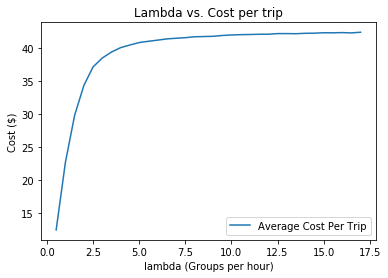

In [22]:
ax = data.plot(x=0, y=1, kind='line', title='Lambda vs. Cost per trip')
ax.set_ylabel('Cost ($)')

Text(0, 0.5, 'Time (min)')

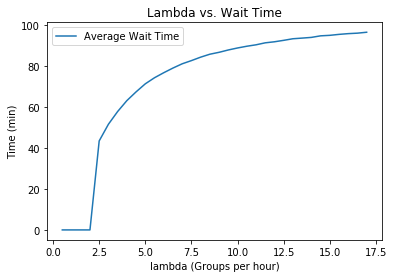

In [23]:
ax = data.plot(x=0, y=2, kind='line', title='Lambda vs. Wait Time')
ax.set_ylabel('Time (min)')

Text(0, 0.5, 'Number of Groups')

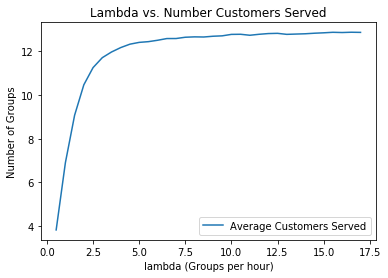

In [24]:
ax = data.plot(x=0, y=3, kind='line', title='Lambda vs. Number Customers Served')
ax.set_ylabel('Number of Groups')

/home/yakaboskic/.local/lib/python3.6/site-packages/pandas/core/indexing.py:630: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


Text(0, 0.5, 'Cost ($)')

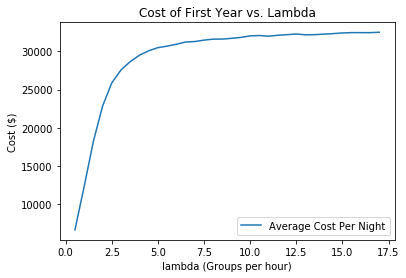

In [25]:
van_cost = 30000
hours_per_day = 4
days = 2*52
total_hours = hours_per_day*days
salary = 10
total_salary = salary*total_hours
data_yearly = data.iloc[:,[0,-1]]
data_yearly.iloc[:,1] = data_yearly.iloc[:,1]*days + total_salary %+ van_cost
ax = data_yearly.plot(x=0, y=1, kind='line', title='Cost of First Year vs. Lambda')
ax.set_ylabel('Cost ($)')

In [26]:
24*52*2

2496

In [27]:
data_yearly.head()

,lambda (Groups per hour),Average Cost Per Night
0,0.5,6648.956631
1,1.0,12307.854975
2,1.5,18227.137696
3,2.0,22837.140206
4,2.5,25888.809595


In [28]:
data_yearly['lamba_actual'] = data_yearly['lambda (Groups per hour)']*2
data_yearly['Cost per Student'] = data_yearly.iloc[:,1]/(data['Average Customers Served']*2*52*2)

/home/yakaboskic/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/yakaboskic/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
data_yearly

,lambda (Groups per hour),Average Cost Per Night,lamba_actual,Cost per Student
0,0.5,6648.956631,1.0,8.363282
1,1.0,12307.854975,2.0,8.572725
2,1.5,18227.137696,3.0,9.651996
3,2.0,22837.140206,4.0,10.482923
4,2.5,25888.809595,5.0,11.053179
5,3.0,27579.826964,6.0,11.317843
6,3.5,28665.775171,7.0,11.507509
7,4.0,29502.746458,8.0,11.646861
8,4.5,30079.515874,9.0,11.723989
9,5.0,30490.121489,10.0,11.805928


In [113]:
df_taxi = pd.read_csv('/mnt/c/Users/c_yak/OneDrive/Pictures/Dartmouth/engs103/cost_taxi.csv')
df_bus = pd.read_csv('/home/yakaboskic/courses/engs103Project/bus/cost_bus.csv')

df_taxi['new index'] = [14-i for i in range(0,15)]
df_taxi = df_taxi.set_index('new index')
df_taxi['T=2 $/student']

new index
14     6.979932
13     7.253436
12     7.567088
11     7.930427
10     8.364961
9      8.879637
8      9.494590
7     10.252659
6     11.244395
5     12.458605
4     14.215887
3     16.678562
2     20.523791
1     27.370176
0     42.979932
Name: T=2 $/student, dtype: float64

In [116]:
df_total = pd.concat([data_yearly['lamba_actual'], 
           data_yearly['Cost per Student'], 
          df_bus['Cost per student served'],
          df_taxi['T=2 $/student'],
          df_taxi['T=1 $/student']], axis=1)
df_total.columns = ['Lambda', 'Van', 'Bus', 'T2', 'T1']

Text(0, 0.5, 'Cost per Student ($)')

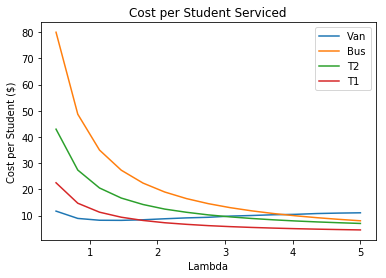

In [122]:
ax = df_total.plot(x=0, y=[1,2,3,4], kind='line', title='Cost per Student Serviced',logy=False)
ax.set_ylabel('Cost per Student ($)')

In [118]:
df_total

,Lambda,Van,Bus,T2,T1
0,0.500000,11.688148,80.000000,42.979932,22.509349
1,0.821429,8.898182,48.695652,27.370176,14.704470
2,1.142857,8.202047,35.000000,20.523791,11.281278
3,1.464286,8.162423,27.317073,16.678562,9.358664
4,1.785714,8.383387,22.400000,14.215887,8.127326
5,2.107143,8.766541,18.983051,12.458605,7.248685
6,2.428571,9.103087,16.470588,11.244395,6.641580
7,2.750000,9.329597,14.545455,10.252659,6.145712
8,3.071429,9.785913,13.023256,9.494590,5.766678
9,3.392857,10.013964,11.789474,8.879637,5.459201
